# Example 3: Ridge Regression

Ridge regression is a linear regression technique that limits the size of the coefficients in the model. It addresses multicollinearity and overfitting by adding a regularization term to the linear regression equation. This term penalizes the magnitude of the coefficients, preventing them from becoming too large. Ridge regression seeks to find a balance between fitting the data well and keeping the model's coefficients as small as possible. It is particularly useful when dealing with datasets with high-dimensional feature spaces or when there is multicollinearity among predictors.

In [1]:
# Standard import
import numpy as np

# Needed to perform ordinary linear regression and ridge regression
from sklearn.linear_model import LinearRegression, Ridge

Below, we generate 100 data points with five predictors, $X_1, \ldots, X_5$, and a dependent variable whose true model is $$Y = 2X_1 + 3X_2 + \frac{X_3}{2} + \epsilon.$$

In addition, there is multicolinearity between $X_1$ and $X_2$ since $$X_2 = - X_1 - 1 + \epsilon.$$


In [2]:
# Generate some sample data with multicollinearity
np.random.seed(3)
features = 5
X = np.random.rand(100, features)  # 100 samples with 5 features

# Create multicollinearity between features 1 and 2
X[:, 1] = -1* X[:, 0] - 1 + np.random.normal(0, 0.1, 100)  # Feature 2 is linearly dependent on Feature 1

# Ground Truth
Y = 2 * X[:, 0] + 3 * X[:, 1] + 0.5 * X[:, 2] + np.random.normal(0, 0.5, 100)

First, let us perform ordinary least squares regression for comparison to ridge regression. Because we will be performing ridge regression using the Scikit-Learn package, we will perform regression using this library as well (as opposed to `statsmodels`).

In [14]:
# Perform Ordinary Least Squares Regression
model = LinearRegression()
model.fit(X, Y)
print("OLS Linear Regression Coefficients:", model.coef_)
print("OLS Linear Regression  Intercept:", model.intercept_)


OLS Linear Regression Coefficients: [ 1.88400781  3.01766333  0.52546451 -0.0342487  -0.03068132]
OLS Linear Regression  Intercept: 0.10798662848878582


This estimated model with rounded coefficients are the following. 

$$\hat Y_{\lambda = 1} = 0.11 + 1.88X_1 + 3.02X_2 + 0.52X_3 - 0.03X_4 - 0.03X_5.$$

We can see that several of the coefficients have changed. Let's see what happens when we choose a stricter value for $\lambda$.


In [15]:
# Create and train a Ridge Regression model
ridge = Ridge(alpha=5) # alpha is regularization strength (a hyperparameter)
ridge.fit(X, Y)

# Print the coefficients
print("Ridge Coefficients:", ridge.coef_)
print("Ridge Intercept:", ridge.intercept_)

Ridge Coefficients: [-0.30405846  0.69333009  0.23135102 -0.03718063 -0.03974103]
Ridge Intercept: -2.1229877605157563


It's important to note that the name of the regularization parameter in Scikit-learn is called $\alpha$ instead of $\lambda$, but these are identical. One reason $\lambda$ is not an ideal name for a parameter is because `lambda` is a reserved word in Python used for lambda functions. If you have not heard of these, I recommend reading this article: https://realpython.com/python-lambda/.

This estimated model with rounded coefficients are the following. 

$$\hat Y_{\lambda = 5} = -2.12 - 0.30X_1 + 0.69X_2 + 0.23X_3 - 0.04X_4 - 0.047X_5.$$

Let's do one more example where $\lambda = 100$.


In [5]:
ridge = Ridge(alpha=100) 
ridge.fit(X, Y)

print("Ridge Coefficients:", ridge.coef_)
print("Ridge Intercept:", ridge.intercept_)

Ridge Coefficients: [-0.08013717  0.10565173  0.02332164 -0.00521804 -0.00795784]
Ridge Intercept: -3.042687209421461


This estimated model with rounded coefficients are the following. 

$$\hat Y_{\lambda = 100} = -3.04 - 0.08X_1 + 0.11X_2 + 0.021X_3 - 0.01X_4 - 0.01X_5.$$

It's important to notice that as $\lambda$ increases, our coefficients decrease. The same is not true for the intercept.

## How to Select $\lambda$

Selecting the appropriate value of the regularization parameter ($\lambda$) when performing Ridge Regression is a crucial step in the modeling process. The goal is to find a $\lambda$ that balances the trade-off between fitting the data well (low bias) and preventing overfitting (low variance). There are several common methods for selecting $\lambda$. The one we want to emphasize and begin with is **visualizing the regularization path**--where we plot how the coefficients change with $\lambda$. 

Visualizing the effect of different values of $\lambda$ in Ridge Regression can help you identify an optimal value that balances bias and variance. To assist us, we will also plot the mean squared error, which is a function of $\lambda$.


In [16]:
# Standard import
import matplotlib.pyplot as plt

# Metrics used to evaluate a model
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.model_selection import train_test_split

### A Train, Test, Split of the Dataset

In machine learning and data analysis, a dataset is typically split into three parts: 
- training,
- validation, and
- testing sets.

These three sets satisfy different needs when building and evaluating a model. 

##### Training Set
The training set is used to find parameters of the model. It is typically the largest portion of the original dataset.

##### Validation Set
The validation set is used to tune the *hyperparameters* of the model. When a model, like ridge regression, contains one or more hyperparameters, like $\lambda$, the validation set is used to iteratively to measure models with different $\lambda$'s trained with the training set. 

##### Testing Set
Once the hyperparameter(s) is(are) selected, the model is constructed based on the training and the validation set with the selected hyperparameter(s). The testing set is then used to evaluate the final model's performance. It serves as an unbiased test of the model's predictive power on new, unseen data.

#### Why the Split is Done

Performing this dataset split provides the following advantages: 
1. **Prevent Overfitting**: By having separate validation and testing sets, you can prevent the model from simply memorizing the training data (overfitting) and ensure it can generalize well to new data.
2. **Model Tuning**: The validation set allows you to fine-tune your model without risking biasing the model to the test data. This way, you can adjust hyperparameters, try different architectures, and experiment with various data preprocessing techniques.
3. **Unbiased Evaluation**: The test set provides an unbiased evaluation of the final model fit on the training dataset. It gives you a realistic expectation of how the model will perform in the real world.
4. **Iterative Improvement**: This approach allows for iterative improvement of models. By understanding how different models perform on the validation set, you can make informed decisions about how to modify and improve your models.
   
The proportion of the split can vary depending on the dataset size and the specific problem, but a common split ratio is 70% training, 15% validation, and 15% testing. That's what we do here. 

In [18]:
# Split the data into training, validation, and testing sets
X_train, X_temp, Y_train, Y_temp = train_test_split(X, Y, test_size=0.3, random_state=3)
X_val, X_test, Y_val, Y_test = train_test_split(X_temp, Y_temp, test_size=0.5, random_state=3)


Now, we will train several models using `X_train` and `Y_train`, all with different values for $\lambda$. Our search space will be: $0.5, 1.0, \ldots 14.5$. 

In order to select a model, we need a method to score each model. Here, we use the mean squared error, abbreviated as MSE. This is calculated as 
$$MSE = \frac{1}{n} \sum_{i=1}^n (y - \hat y)^2.$$
In otherwords, we take the sum of the squared residuals (also known as the residual sum of squares) and divide by the number of elements in our set. Here, the set we use is the validation set to score the model. 

In addition to collected the scores, we also collect the coefficient sizes of the model. We do this for graphing purposes, which happen a little later. 

In [19]:
# Create a range of lambda values
lambdas = np.arange(0.5, 15, 0.5)

# Initialize arrays to store coefficients and MSE values
coefficients = []
mse_values = []

# Fit Ridge Regression models and calculate MSE for different lambda values
for lam in lambdas:
    ridge = Ridge(alpha=lam)
    ridge.fit(X_train, Y_train) # fit with training set
    coefficients.append(ridge.coef_)
    
    Y_pred = ridge.predict(X_val)
    mse = mean_squared_error(Y_val, Y_pred) #evaluate with validation set
    mse_values.append(mse)

# Convert coefficients and MSE values to numpy arrays for easier manipulation
coefficients = np.array(coefficients)
mse_values = np.array(mse_values)


Now we can find the index corresponding to the lowest validation MSE, `np.argmin(mse_values)` and find the $\lambda$ value at that entry. We implement rounding since there is a possibility of a floating point error. Our selected hyperparameter is $\lambda = 1.4$.

In [23]:
# Lambda value corresponding to the model with lowest validation MSE
print(mse_values)
print(np.min(mse_values))
best_lambda = round(lambdas[np.argmin(mse_values)], 2)
print(best_lambda)

[0.19047029 0.18896664 0.18588426 0.18262571 0.17959523 0.17690625
 0.17457416 0.17257925 0.17089006 0.1694727  0.16829465 0.16732618
 0.16654074 0.16591495 0.16542832 0.16506299 0.1648034  0.16463598
 0.16454893 0.16453194 0.16457603 0.16467333 0.16481697 0.16500092
 0.16521991 0.16546927 0.16574494 0.16604331 0.16636121]
0.16453194090753342
10.0


In this example, we calculate the MSE of the validation set for each lambda value and visualize both the coefficient paths (top subplot) and the corresponding MSE values (bottom subplot). By analyzing this combined plot, you can identify the lambda value that minimizes the MSE and choose it as the optimal lambda for your Ridge Regression model.

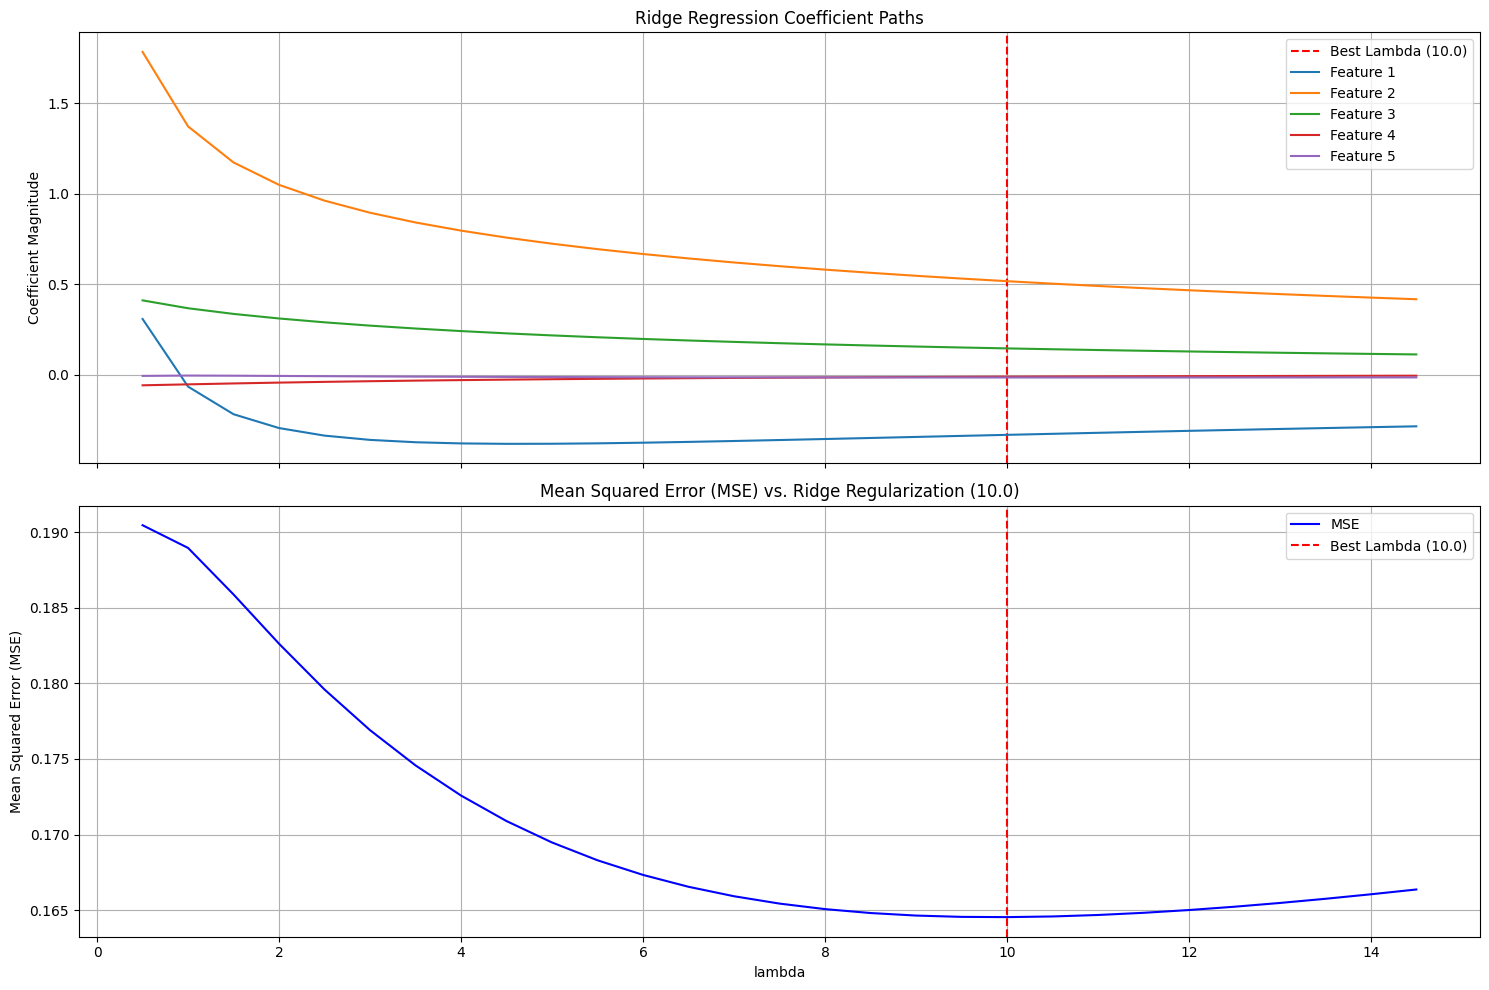

In [10]:
# Create a subplot with two plots (coefficient paths and MSE values)
fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(15, 10), sharex=True)

# Plot the coefficient paths
ax1.axvline(x=best_lambda, color='red', linestyle='--', 
            label=f'Best Lambda ({best_lambda})')
for feature in range(features):
    ax1.plot(lambdas, coefficients[:, feature],
             label=f'Feature {feature + 1}')
ax1.set_ylabel('Coefficient Magnitude')
ax1.set_title('Ridge Regression Coefficient Paths')
ax1.legend()
ax1.grid()

# Plot the MSE values
ax2.plot(lambdas, mse_values, color='blue', label='MSE')
ax2.axvline(x=best_lambda, color='r', linestyle='--', 
            label=f'Best Lambda ({best_lambda})')
ax2.set_xlabel('lambda')
ax2.set_ylabel('Mean Squared Error (MSE)')
ax2.set_title(f'Mean Squared Error (MSE) vs. Ridge Regularization ({best_lambda})')
ax2.legend()
ax2.grid()

plt.tight_layout()
plt.show()

Now that we have selected $\lambda$, we can construct the final model with that value using both the training and validation set. 

In [11]:
# For fitting the function once hyperparameters are selected
X_train_val = np.concatenate((X_train, X_val))
Y_train_val = np.concatenate((Y_train, Y_val))

# Compute the final model
ridge = Ridge(alpha=best_lambda) 
ridge.fit(X_train_val, Y_train_val)

print("Ridge Coefficients:", ridge.coef_)
print("Ridge Intercept:", ridge.intercept_)

Ridge Coefficients: [-0.32999509  0.52642377  0.12527393 -0.05983728 -0.00742671]
Ridge Intercept: -2.309059280768713


The model constructed is 
$$\hat Y_{\lambda = 10.0} = -2.31 - 0.33X_1 + 0.53X_2 + 0.13X_3 - 0.06X_4 - 0.01X_5.$$

We now test the model against the testing set. 

In [12]:
# Evaluate the final model
Y_test_pred = ridge.predict(X_test)
mse = mean_squared_error(Y_test, Y_test_pred)
r2 = r2_score(Y_test, Y_test_pred)
print(f"The testing set MSE for Ridge Regression is {mse}")

The testing set MSE for Ridge Regression is 0.18072429056374792


For reference, let's compute the same metrics for the ordinary least squares linear regression.

In [13]:
# For comparison to Ordinary Least Squares Linear Regression

# Fit model to same dataset
ols = LinearRegression()
ols.fit(X_train_val, Y_train_val)

# Find same scores
Y_test_pred = ols.predict(X_test)
mse = mean_squared_error(Y_test, Y_test_pred)
r2 = r2_score(Y_test, Y_test_pred)
print(f"The testing set MSE for linear regression is {mse}")

The testing set MSE for linear regression is 0.2794245956754686


Even though OLS Regression is BLUE--the best linear unbiased estimator--it can be beaten by biased estimators, like ridge regression.